# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#Sample Set
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
print(cities)

# Print the city count to confirm sufficient count
len(cities)

['dikson', 'ushuaia', 'iqaluit', 'souillac', 'zhezkazgan', 'omboue', 'golden', 'illoqqortoormiut', 'ostrovnoy', 'yumen', 'mar del plata', 'cape town', 'ancud', 'santa cruz', 'vaini', 'sao filipe', 'belaya gora', 'zhigansk', 'vangaindrano', 'grand river south east', 'atuona', 'kindersley', 'hilo', 'havre-saint-pierre', 'portland', 'manta', 'north platte', 'jamestown', 'kodiak', 'busselton', 'hermanus', 'butaritari', 'labuhan', 'lincoln', 'rantepao', 'puerto ayora', 'vila franca do campo', 'punta arenas', 'thompson', 'usinsk', 'kapaa', 'east london', 'wamba', 'belushya guba', 'rikitea', 'sibolga', 'ilhabela', 'taolanaro', 'airai', 'khatanga', 'mariental', 'namibe', 'tarudant', 'hobbs', 'mahebourg', 'matara', 'samusu', 'mataura', 'cabo san lucas', 'sakakah', 'hamilton', 'taoudenni', 'staroutkinsk', 'kavaratti', 'amderma', 'lebu', 'fartura', 'vaitape', 'priladozhskiy', 'castro', 'micheweni', 'coihaique', 'qaanaaq', 'makakilo city', 'crossville', 'yola', 'albany', 'sol-iletsk', 'nguiu', 'ba

80

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
#print(base_url)

# Create the lists to hold relative data
found_cities =[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Create a query url for each city in the cities list to get json response

print("Processing API calls from Open Weather")
for city in cities:
    
    time.sleep(1)
         
    # Create API url for each city
    query_url = base_url +"&q=" + city

    
    # Get json respose for each city
    response = requests.get(query_url).json()

   # Add the values to the lists
    try:       
        found_cities.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])

        print(f"{city} was found in weather data") 
        
    except KeyError:
        print(f"{city} not found. Skipped")
        pass
        
print("End of City list")



Processing API calls from Open Weather
dikson was found in weather data
ushuaia was found in weather data
iqaluit was found in weather data
souillac was found in weather data
zhezkazgan was found in weather data
omboue was found in weather data
golden was found in weather data
illoqqortoormiut not found. Skipped
ostrovnoy was found in weather data
yumen was found in weather data
mar del plata was found in weather data
cape town was found in weather data
ancud was found in weather data
santa cruz was found in weather data
vaini was found in weather data
sao filipe was found in weather data
belaya gora was found in weather data
zhigansk was found in weather data
vangaindrano was found in weather data
grand river south east not found. Skipped
atuona was found in weather data
kindersley was found in weather data
hilo was found in weather data
havre-saint-pierre was found in weather data
portland was found in weather data
manta was found in weather data
north platte was found in weather dat

In [51]:
#Create Dictionary

weather_raw_data = {
    "City": found_cities,
    "Latitude": lat,
    "Lng": lng,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
    "Date":date
    }

#Create Data Frame
weather_df = pd.DataFrame.from_dict(weather_raw_data, orient= 'columns')

#export to cs
weather_df.to_csv("output_data/cities.csv", index = False)
weather_df

,City,Latitude,Lng,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed
0,Dikson,73.51,80.55,93,RU,1603130569,95,23.76,17.87
1,Ushuaia,-54.80,-68.30,75,AR,1603130276,86,39.20,34.45
2,Iqaluit,63.75,-68.51,29,CA,1603130565,74,33.01,4.00
3,Souillac,-20.52,57.52,40,MU,1603130568,69,75.20,11.41
4,Zhezkazgan,47.80,67.71,19,KZ,1603130304,46,51.22,8.10
...,...,...,...,...,...,...,...,...,...
66,Makakilo City,21.35,-158.09,75,US,1603130879,83,78.80,4.70
67,Crossville,35.95,-85.03,1,US,1603130657,60,71.01,5.82
68,Yola,9.20,12.48,9,NG,1603130882,45,84.54,3.42
69,Albany,42.60,-73.97,85,US,1603130394,69,60.01,7.27


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

In [52]:
#Create Plot Dates
plot_date =({datetime.datetime.now().strftime("%D")})

TypeError: 'str' object is not callable

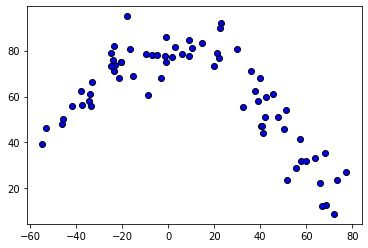

In [54]:
#create plot
plt.scatter(weather_df['Latitude'],weather_df['Max Temp'],edgecolors='black',facecolors='b')

#title and labels
plt.title(f'Latitude vs. MAX Temperature ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

#Save Plot
plt.savefig(f'images/Latitude vs. MAX Temperature.png')

### Latitude vs. Humidity Plot

TypeError: 'str' object is not callable

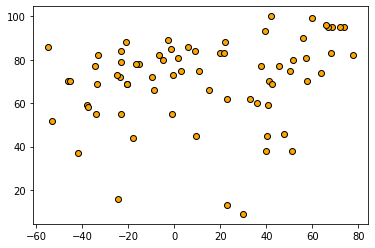

In [46]:
#create plot
plt.scatter(weather_df['Latitude'],weather_df['Humidity'],edgecolors='black',facecolors='orange')

#title and labels
plt.title(f'Latitude vs. Humidity ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Max Humidity')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

#Save Plot
plt.savefig(f"Images/Latitude vs. Humidity.png")

### Latitude vs. Cloudiness Plot

TypeError: 'str' object is not callable

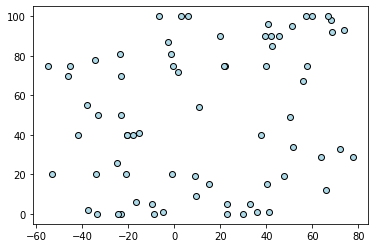

In [45]:
#Create Plot
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'],edgecolors='black',facecolors='lightblue')

#titles and lables
plt.title(f'Latitude vs. Cloudiness ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

#Save Plot
plt.savefig(f"images/Latitude vs. Cloudiness.png")

### Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolors="black",facecolors='b')
plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.savefig(f"City Latitude vs. Wind Speed {title_date}.png")

## Linear Regression

### Write linear regression plot function (optional)

In [ ]:
#create hemispheres
north_hem = weather_df.loc[weather_df["Latitude"] >= 0]
south_hem = weather_df.loc[weather_df["Latitude"] < 0]


In [ ]:
# Define function
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define annotation
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="orange")

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#plot variable
title_1 = "Northern Hemisphere - Max Temp vs. Latitude Regression"

#use functions
equation = linear_regression(north_hem["Latitude"],north_hem["Max Temp"])
annotate(equation, 0, 0)

#title and labels
plt.title=(f"{title_1}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig(f"Images/{title_1}.png")

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#plot variable
title_2 = "Southern Hemisphere - Max Temp vs. Latitude Regression"

#use functions
equation = linear_regression(south_hem["Latitude"],south_hem["Max Temp"])
annotate(equation, -30, 50)

#title and labels
plt.title=(f"{title_2}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(f"Images/{title_2}.png")

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#plot variable
title_3 = "Northern Hemisphere - Humidity (%) vs. Latitude Regression"

#use functions
equation = linear_regression(north_hem["Humidity"],north_hem["Max Temp"])
annotate(equation, 20, 15)

#title and labels
plt.title=(f"{title_3}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(f"Images/{title_3}.png")

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#plot variable
title_4 = "Southern Hemisphere - Humidity (%) vs. Latitude Regression"

#use functions
equation = linear_regression(south_hem["Humidity"],south_hem["Max Temp"])
annotate(equation, 10, 50)

#title and labels
plt.title=(f"{title_4}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(f"Images/{title_4}.png")

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#plot variable
title_5 = "Northern Hemisphere - Cloudiness vs. Latitude Regression"

#use functions
equation = linear_regression(north_hem["Cloudiness"],north_hem["Max Temp"])
annotate(equation, 0, 10)

#title and labels
plt.title=(f"{title_5}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(f"Images/{title_5}.png")

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#plot variable
title_5 = "Southern Hemisphere - Max Temp vs. Latitude Regression"

#use functions
equation = linear_regression(south_hem["Cloudiness"],south_hem["Max Temp"])
annotate(equation, 30, 40)

#title and labels
plt.title=(f"{title_5}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(f"Images/{title_5}.png")

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#plot variable
title_7 = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Regression"

#use functions
equation = linear_regression(north_hem["Wind Speed"],north_hem["Max Temp"])
annotate(equation, 0, 0)

#title and labels
plt.title = (f"{title_7}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig(f"Images/{title_7}.png")

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#plot variable
title_7 = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Regression"

#use functions
equation = linear_regression(north_hem['Wind Speed'],north_hem['Latitude'])
annotate(equation, 0, 0)

#title and labels
plt.title =(f'{title_7} {datetime.datetime.now().strftime("%D")}')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')

# Save the figure
plt.savefig(f'{title_7} {datetime.datetime.now().strftime("%D")}.png')